In [142]:
# Import appropriate libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import math
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import RidgeCV

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('display.max_columns',200) #allows for up to 200 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows',100)
plt.style.use('seaborn') # a style that can be used for plots - see style reference above

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [143]:
# Import dataset
df = pd.read_csv('Data/EPL Standings 2010-2021.csv')

In [144]:
#Take a look a what the data looks like
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Season                       220 non-null    object
 1   Pos                          220 non-null    int64 
 2   Team                         220 non-null    object
 3   Pld                          220 non-null    int64 
 4   W                            220 non-null    int64 
 5   D                            220 non-null    int64 
 6   L                            220 non-null    int64 
 7   GF                           220 non-null    int64 
 8   GA                           220 non-null    int64 
 9   GD                           220 non-null    int64 
 10  Pts                          220 non-null    int64 
 11  Qualification or relegation  220 non-null    object
dtypes: int64(9), object(3)
memory usage: 20.8+ KB


In [145]:
df.head(5)

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,2010-11,1,Manchester United,38,23,11,4,78,37,41,80,Qualification for the Champions League group s...
1,2010-11,2,Chelsea,38,21,8,9,69,33,36,71,Qualification for the Champions League group s...
2,2010-11,3,Manchester City,38,21,8,9,60,33,27,71,Qualification for the Champions League group s...
3,2010-11,4,Arsenal,38,19,11,8,72,43,29,68,Qualification for the Champions League play-of...
4,2010-11,5,Tottenham Hotspur,38,16,14,8,55,46,9,62,Qualification for the Europa League play-off r...


In [146]:
# Check if there are any missing values?
print("Are there any missing values?:")
print(df.isnull().values.any())

Are there any missing values?:
False


In [147]:
#Check most goals scored
print("The team that scored the most amount of goals was...")
df[df['GF'] == df['GF'].max()]

The team that scored the most amount of goals was...


,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
140,2017-18,1,Manchester City,38,32,4,2,106,27,79,100,Qualification for the Champions League group s...


In [148]:
#Check least goals scored
print("The team that had the least amount of goals scored.")
df[df['GF'] == df['GF'].min()]

The team that had the least amount of goals scored.


,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
219,2020-21,20,Sheffield United,38,7,2,29,20,63,-43,23,Relegation to the EFL Championship


<AxesSubplot:title={'center':'Points Each Team Position Was Awarded'}, xlabel='Pos', ylabel='Pts'>

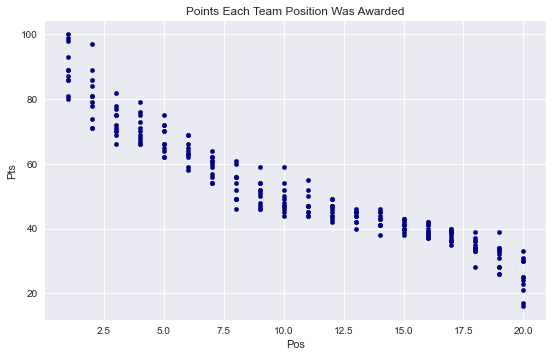

In [149]:
#Scatterplot
#https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.html
df.plot.scatter(x ='Pos', y ='Pts', c = 'Darkblue', title = "Points Each Team Position Was Awarded")

In [150]:
#Average goals scored for each team position

#Declare variables
gfseed1 = 0
gfseed2 = 0
gfseed3 = 0
gfseed4 = 0
gfseed5 = 0
gfseed6 = 0
gfseed7 = 0
gfseed8 = 0
gfseed9 = 0
gfseed10 = 0
gfseed11 = 0
gfseed12 = 0
gfseed13 = 0
gfseed14 = 0
gfseed15 = 0
gfseed16 = 0
gfseed17 = 0
gfseed18 = 0
gfseed19 = 0
gfseed20 = 0

#Loops through DF and adds all the goals scored to the respected team position
for i in range(len(df)):
    if df["Pos"][i] == 1:
        gfseed1 += df["GF"][i].sum()
    elif df["Pos"][i] == 2:
        gfseed2 += df["GF"][i].sum()
    elif df["Pos"][i] == 3:
        gfseed3 += df["GF"][i].sum()
    elif df["Pos"][i] == 4:
        gfseed4 += df["GF"][i].sum()
    elif df["Pos"][i] == 5:
        gfseed5 += df["GF"][i].sum()
    elif df["Pos"][i] == 6:
        gfseed6 += df["GF"][i].sum()
    elif df["Pos"][i] == 7:
        gfseed7 += df["GF"][i].sum()
    elif df["Pos"][i] == 8:
        gfseed8 += df["GF"][i].sum()
    elif df["Pos"][i] == 9:
        gfseed9 += df["GF"][i].sum()
    elif df["Pos"][i] == 10:
        gfseed10 += df["GF"][i].sum()
    elif df["Pos"][i] == 11:
        gfseed11 += df["GF"][i].sum()
    elif df["Pos"][i] == 12:
        gfseed12 += df["GF"][i].sum()
    elif df["Pos"][i] == 13:
        gfseed13 += df["GF"][i].sum()
    elif df["Pos"][i] == 14:
        gfseed14 += df["GF"][i].sum()
    elif df["Pos"][i] == 15:
        gfseed15 += df["GF"][i].sum()
    elif df["Pos"][i] == 16:
        gfseed16 += df["GF"][i].sum()
    elif df["Pos"][i] == 17:
        gfseed17 += df["GF"][i].sum()
    elif df["Pos"][i] == 18:
        gfseed18 += df["GF"][i].sum()
    elif df["Pos"][i] == 19:
        gfseed19 += df["GF"][i].sum()
    elif df["Pos"][i] == 20:
        gfseed20 += df["GF"][i].sum()

# Calculate average for Goals Scored
gfseed1 = int(gfseed1/11)
gfseed2 = int(gfseed2/11)
gfseed3 = int(gfseed3/11)
gfseed4 = int(gfseed4/11)
gfseed5 = int(gfseed5/11)
gfseed6 = int(gfseed6/11)
gfseed7 = int(gfseed7/11)
gfseed8 = int(gfseed8/11)
gfseed9 = int(gfseed9/11)
gfseed10 = int(gfseed10/11)
gfseed11 = int(gfseed11/11)
gfseed12 = int(gfseed12/11)
gfseed13 = int(gfseed13/11)
gfseed14 = int(gfseed14/11)
gfseed15 = int(gfseed15/11)
gfseed16 = int(gfseed16/11)
gfseed17 = int(gfseed17/11)
gfseed18 = int(gfseed18/11)
gfseed19 = int(gfseed19/11)
gfseed20 = int(gfseed20/11)

In [151]:
#Average goals allowed for each team position

#Declare variables
gaseed1 = 0
gaseed2 = 0
gaseed3 = 0
gaseed4 = 0
gaseed5 = 0
gaseed6 = 0
gaseed7 = 0
gaseed8 = 0
gaseed9 = 0
gaseed10 = 0
gaseed11 = 0
gaseed12 = 0
gaseed13 = 0
gaseed14 = 0
gaseed15 = 0
gaseed16 = 0
gaseed17 = 0
gaseed18 = 0
gaseed19 = 0
gaseed20 = 0

#Loops through DF and adds all the goals allowed to the respected seed
for i in range(len(df)):
    if df["Pos"][i] == 1:
        gaseed1 += df["GA"][i].sum()
    elif df["Pos"][i] == 2:
        gaseed2 += df["GA"][i].sum()
    elif df["Pos"][i] == 3:
        gaseed3 += df["GA"][i].sum()
    elif df["Pos"][i] == 4:
        gaseed4 += df["GA"][i].sum()
    elif df["Pos"][i] == 5:
        gaseed5 += df["GA"][i].sum()
    elif df["Pos"][i] == 6:
        gaseed6 += df["GA"][i].sum()
    elif df["Pos"][i] == 7:
        gaseed7 += df["GA"][i].sum()
    elif df["Pos"][i] == 8:
        gaseed8 += df["GA"][i].sum()
    elif df["Pos"][i] == 9:
        gaseed9 += df["GA"][i].sum()
    elif df["Pos"][i] == 10:
        gaseed10 += df["GA"][i].sum()
    elif df["Pos"][i] == 11:
        gaseed11 += df["GA"][i].sum()
    elif df["Pos"][i] == 12:
        gaseed12 += df["GA"][i].sum()
    elif df["Pos"][i] == 13:
        gaseed13 += df["GA"][i].sum()
    elif df["Pos"][i] == 14:
        gaseed14 += df["GA"][i].sum()
    elif df["Pos"][i] == 15:
        gaseed15 += df["GA"][i].sum()
    elif df["Pos"][i] == 16:
        gaseed16 += df["GA"][i].sum()
    elif df["Pos"][i] == 17:
        gaseed17 += df["GA"][i].sum()
    elif df["Pos"][i] == 18:
        gaseed18 += df["GA"][i].sum()
    elif df["Pos"][i] == 19:
        gaseed19 += df["GA"][i].sum()
    elif df["Pos"][i] == 20:
        gaseed20 += df["GA"][i].sum()

# Calculate average for Goals Allowed
gaseed1 = int(gaseed1/11)
gaseed2 = int(gaseed2/11)
gaseed3 = int(gaseed3/11)
gaseed4 = int(gaseed4/11)
gaseed5 = int(gaseed5/11)
gaseed6 = int(gaseed6/11)
gaseed7 = int(gaseed7/11)
gaseed8 = int(gaseed8/11)
gaseed9 = int(gaseed9/11)
gaseed10 = int(gaseed10/11)
gaseed11 = int(gaseed11/11)
gaseed12 = int(gaseed12/11)
gaseed13 = int(gaseed13/11)
gaseed14 = int(gaseed14/11)
gaseed15 = int(gaseed15/11)
gaseed16 = int(gaseed16/11)
gaseed17 = int(gaseed17/11)
gaseed18 = int(gaseed18/11)
gaseed19 = int(gaseed19/11)
gaseed20 = int(gaseed20/11)

In [152]:
#Average goal differential for each seed

#Declare variables
gdseed1 = 0
gdseed2 = 0
gdseed3 = 0
gdseed4 = 0
gdseed5 = 0
gdseed6 = 0
gdseed7 = 0
gdseed8 = 0
gdseed9 = 0
gdseed10 = 0
gdseed11 = 0
gdseed12 = 0
gdseed13 = 0
gdseed14 = 0
gdseed15 = 0
gdseed16 = 0
gdseed17 = 0
gdseed18 = 0
gdseed19 = 0
gdseed20 = 0

#Loops through DF and adds all the goals scored to the respected seed
for i in range(len(df)):
    if df["Pos"][i] == 1:
        gdseed1 += df["GD"][i].sum()
    elif df["Pos"][i] == 2:
        gdseed2 += df["GD"][i].sum()
    elif df["Pos"][i] == 3:
        gdseed3 += df["GD"][i].sum()
    elif df["Pos"][i] == 4:
        gdseed4 += df["GD"][i].sum()
    elif df["Pos"][i] == 5:
        gdseed5 += df["GD"][i].sum()
    elif df["Pos"][i] == 6:
        gdseed6 += df["GD"][i].sum()
    elif df["Pos"][i] == 7:
        gdseed7 += df["GD"][i].sum()
    elif df["Pos"][i] == 8:
        gdseed8 += df["GD"][i].sum()
    elif df["Pos"][i] == 9:
        gdseed9 += df["GD"][i].sum()
    elif df["Pos"][i] == 10:
        gdseed10 += df["GD"][i].sum()
    elif df["Pos"][i] == 11:
        gdseed11 += df["GD"][i].sum()
    elif df["Pos"][i] == 12:
        gdseed12 += df["GD"][i].sum()
    elif df["Pos"][i] == 13:
        gdseed13 += df["GD"][i].sum()
    elif df["Pos"][i] == 14:
        gdseed14 += df["GD"][i].sum()
    elif df["Pos"][i] == 15:
        gdseed15 += df["GD"][i].sum()
    elif df["Pos"][i] == 16:
        gdseed16 += df["GD"][i].sum()
    elif df["Pos"][i] == 17:
        gdseed17 += df["GD"][i].sum()
    elif df["Pos"][i] == 18:
        gdseed18 += df["GD"][i].sum()
    elif df["Pos"][i] == 19:
        gdseed19 += df["GD"][i].sum()
    elif df["Pos"][i] == 20:
        gdseed20 += df["GD"][i].sum()
        
# Calculate average for Goal Differentials
gdseed1 = int(gdseed1/11)
gdseed2 = int(gdseed2/11)
gdseed3 = int(gdseed3/11)
gdseed4 = int(gdseed4/11)
gdseed5 = int(gdseed5/11)
gdseed6 = int(gdseed6/11)
gdseed7 = int(gdseed7/11)
gdseed8 = int(gdseed8/11)
gdseed9 = int(gdseed9/11)
gdseed10 = int(gdseed10/11)
gdseed11 = int(gdseed11/11)
gdseed12 = int(gdseed12/11)
gdseed13 = int(gdseed13/11)
gdseed14 = int(gdseed14/11)
gdseed15 = int(gdseed15/11)
gdseed16 = int(gdseed16/11)
gdseed17 = int(gdseed17/11)
gdseed18 = int(gdseed18/11)
gdseed19 = int(gdseed19/11)
gdseed20 = int(gdseed20/11)

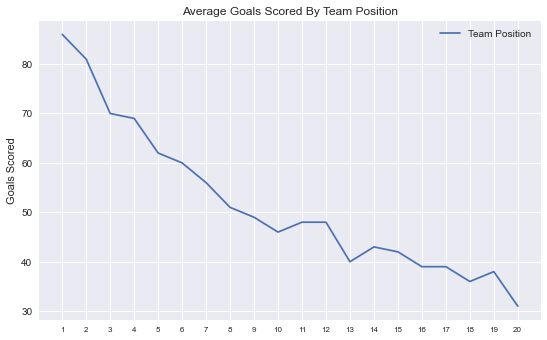

In [153]:
#Labels for line graph
seed_label = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"]
seed_gf = [gfseed1,gfseed2,gfseed3,gfseed4,gfseed5,gfseed6,gfseed7,gfseed8,gfseed9,gfseed10,gfseed11,gfseed12,gfseed13,gfseed14,gfseed15,gfseed16,gfseed17,gfseed18,gfseed19,gfseed20]

y_pos = np.arange(len(seed_label))
    
# Creates a line graph for Goals Scored
fig, ax = plt.subplots()
ax.plot(seed_label, seed_gf, label="Team Position")
plt.tick_params(axis='x', which='major', labelsize=8)
plt.ylabel('Goals Scored')
plt.title("Average Goals Scored By Team Position")
ax.legend()
plt.show()

C:\Users\Ryan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


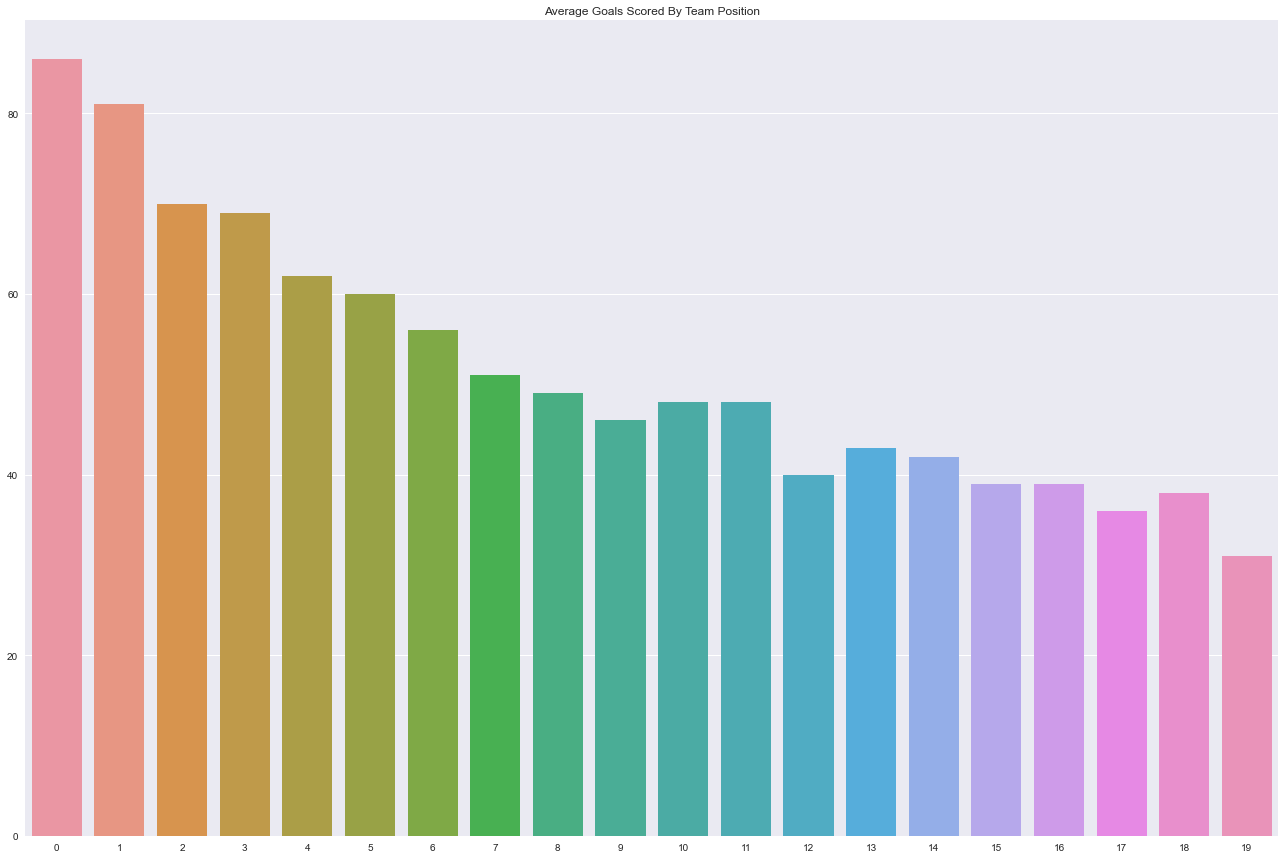

In [154]:
# Creates bar chart for Goals Scored
plt.figure(figsize=(20, 15))
y_pos = np.arange(len(seed_label))
sns.barplot(y_pos, seed_gf)
plt.title("Average Goals Scored By Team Position")

plt.show()

In [155]:
#Print out Team Position 1's average goals scored
print("Team Position 1 scored",gfseed1,"goals on average.")

#Print out Team Position 20's average goals scored
print("Team Position 20 scored",gfseed20,"goals on average.")

Team Position 1 scored 86 goals on average.
Team Position 20 scored 31 goals on average.


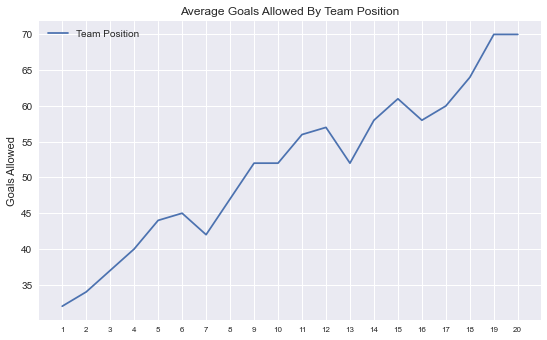

In [156]:
#Labels for line graph
seed_label = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"]
seed_ga = [gaseed1,gaseed2,gaseed3,gaseed4,gaseed5,gaseed6,gaseed7,gaseed8,gaseed9,gaseed10,gaseed11,gaseed12,gaseed13,gaseed14,gaseed15,gaseed16,gaseed17,gaseed18,gaseed19,gaseed20]

y_pos = np.arange(len(seed_label))
    
# Creates a line graph for Goals Allowed
fig, ax = plt.subplots()
ax.plot(seed_label, seed_ga, label="Team Position")
plt.tick_params(axis='x', which='major', labelsize=8)
plt.ylabel('Goals Allowed')
plt.title("Average Goals Allowed By Team Position")
ax.legend()
plt.show()

C:\Users\Ryan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


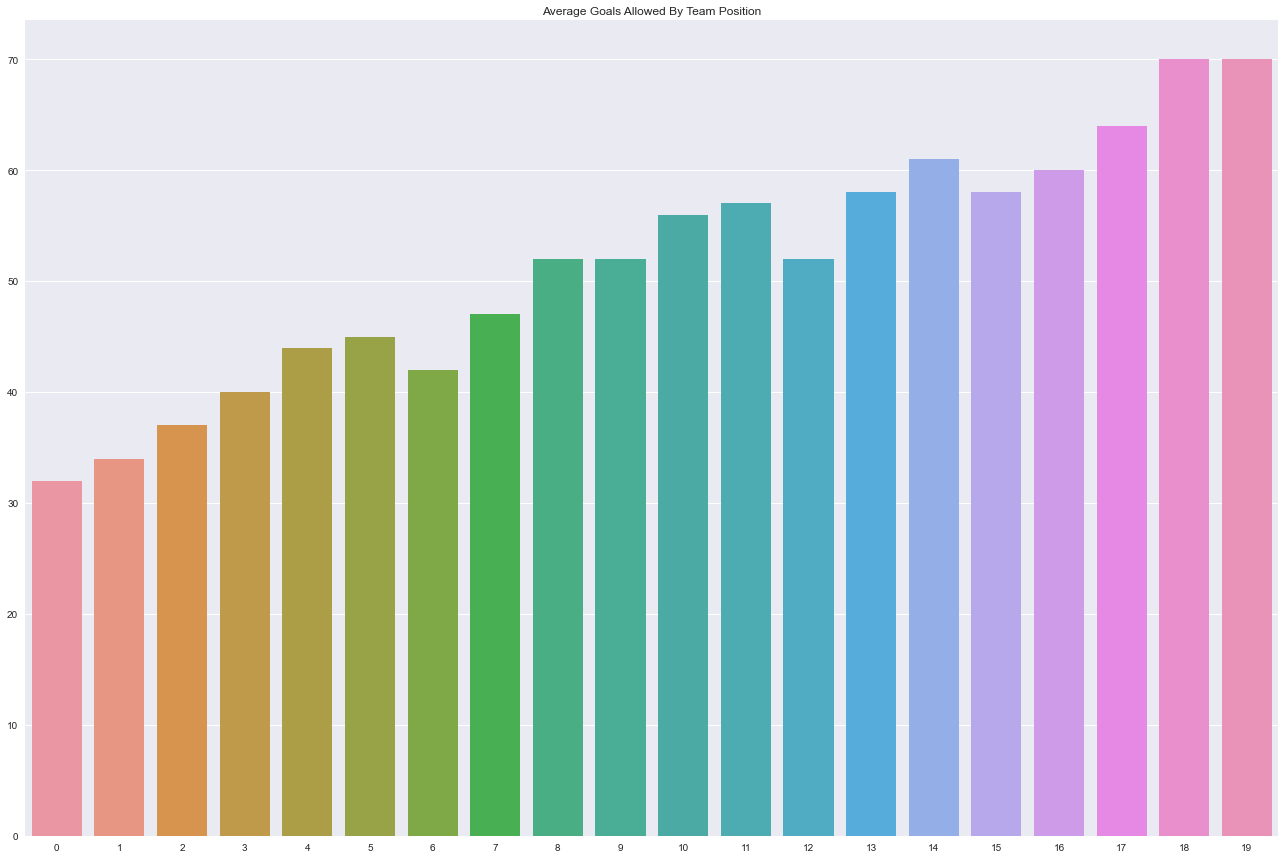

In [158]:
# Creates bar chart for Goals Allowed
plt.figure(figsize=(20, 15))
y_pos = np.arange(len(seed_label))
sns.barplot(y_pos, seed_ga)
plt.title("Average Goals Allowed By Team Position")
plt.show()

In [159]:
#Print out Team Position 1's average goals allowed
print("Team Position 1 allowed",gaseed1,"goals on average.")

#Print out Team Position 20's average goals allowed
print("Team Position 20 allowed",gaseed20,"goals on average.")

Team Position 1 allowed 32 goals on average.
Team Position 20 allowed 70 goals on average.


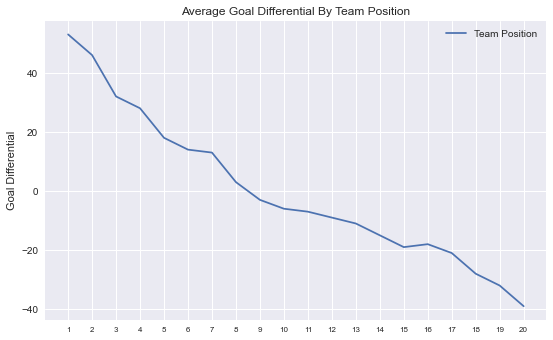

In [160]:
# Labels for line graph
seed_label = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"]
seed_gd = [gdseed1,gdseed2,gdseed3,gdseed4,gdseed5,gdseed6,gdseed7,gdseed8,gdseed9,gdseed10,gdseed11,gdseed12,gdseed13,gdseed14,gdseed15,gdseed16,gdseed17,gdseed18,gdseed19,gdseed20]

y_pos = np.arange(len(seed_label))
    
# Creates a line graph for Goal Differential
fig, ax = plt.subplots()
ax.plot(seed_label, seed_gd, label="Team Position")
plt.tick_params(axis='x', which='major', labelsize=8)
plt.ylabel('Goal Differential')
plt.title("Average Goal Differential By Team Position")
ax.legend()
plt.show()

C:\Users\Ryan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


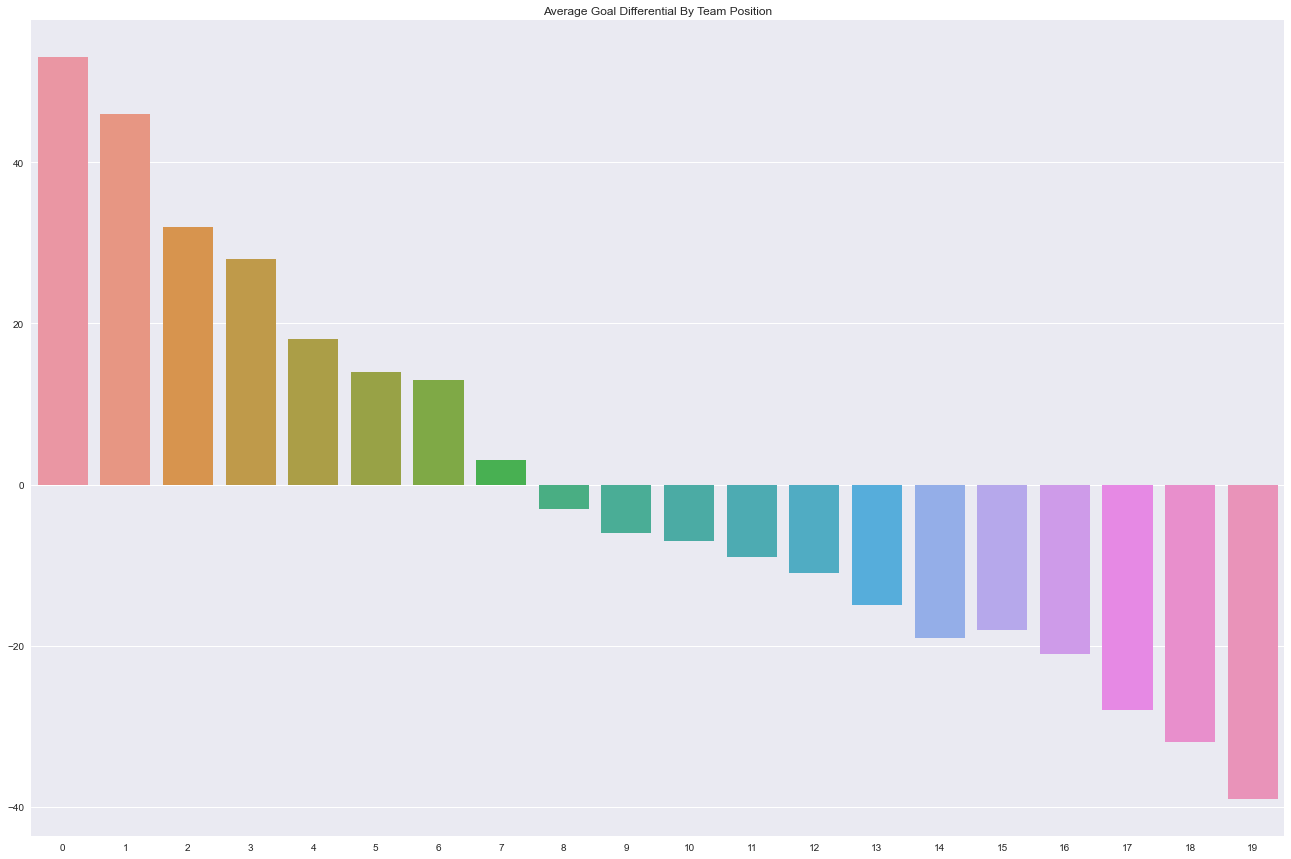

In [161]:
# Creates bar chart for Goal Differential
plt.figure(figsize=(20, 15))
y_pos = np.arange(len(seed_label))
sns.barplot(y_pos, seed_gd)
plt.title("Average Goal Differential By Team Position")
plt.show()

In [162]:
#Print out Team Position 1's average goal differential
print("Team Position 1 had a goal differential of",gdseed1,"on average.")

#Print out Team Position 1's average goal differential
print("Team Position 20 had a goal differential of",gdseed20,"on average.")

Team Position 1 had a goal differential of 53 on average.
Team Position 20 had a goal differential of -39 on average.


In [163]:
#Create variable for numeric features excluding "Pld" column

#Create a df to drop "Pld" Column
tempdf = df
tempdf = tempdf.drop('Pld', 1)
corr = tempdf
numeric_features = corr.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Pos', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts'], dtype='object')

<AxesSubplot:title={'center':'Correlation of Numeric Features'}>

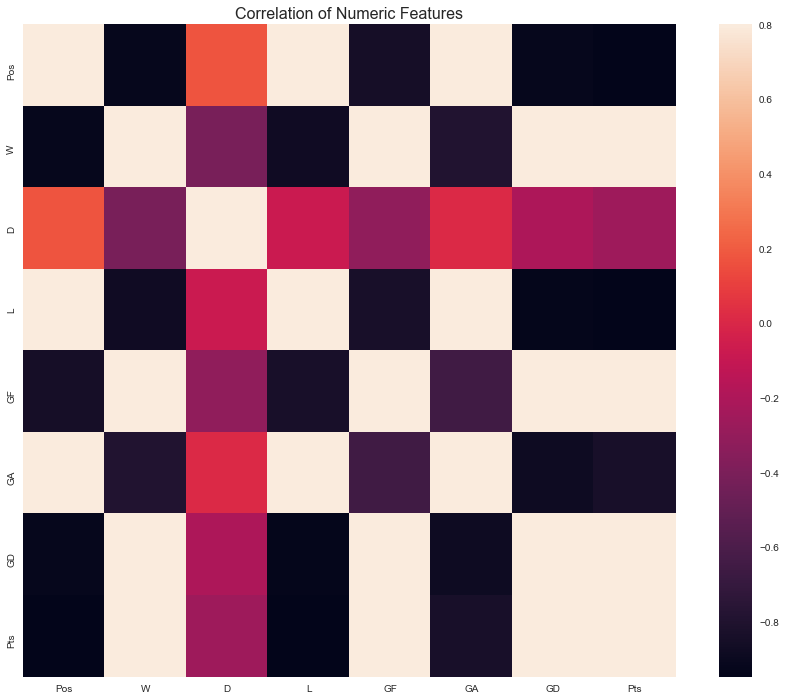

In [164]:
#Create heatmap for numeric features excluding "Pld" column
correlation = numeric_features.corr()
f, ax = plt.subplots(figsize = (14, 12))
plt.title('Correlation of Numeric Features', y=1, size=16)
sns.heatmap(correlation, square=True, vmax=0.8)

In [165]:
df['Qualification or relegation'].unique()

array(['Qualification for the Champions League group stage',
       'Qualification for the Champions League play-off round',
       'Qualification for the Europa League play-off round',
       'Not Applicable',
       'Qualification for the Europa League first qualifying round[b]',
       'Qualification for the Europa League third qualifying round[c]',
       'Qualification for the Europa League play-off round[a]Relegation to the Football League Championship',
       'Relegation to the Football League Championship',
       'Qualification for the Europa League group stage[a]',
       'Qualification for the Europa League play-off round[a]',
       'Qualification for the Champions League group stage[a]',
       'Qualification for the Europa League third qualifying round[b]',
       'Qualification for the Europa League group stage[b]Relegation to the Football League Championship',
       'Qualification for the Europa League group stage',
       'Qualification for the Europa League third qu

In [191]:
df['Champions League'] = df['Qualification or relegation'].str.extract('(Champions\sLeague\sgroup)')
#https://stackoverflow.com/questions/36028932/how-to-extract-specific-content-in-a-pandas-dataframe-with-a-regex

In [192]:
df['Europa League'] = df['Qualification or relegation'].str.extract('(Europa\sLeague\sgroup)')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Season                       220 non-null    object
 1   Pos                          220 non-null    int64 
 2   Team                         220 non-null    object
 3   Pld                          220 non-null    int64 
 4   W                            220 non-null    int64 
 5   D                            220 non-null    int64 
 6   L                            220 non-null    int64 
 7   GF                           220 non-null    int64 
 8   GA                           220 non-null    int64 
 9   GD                           220 non-null    int64 
 10  Pts                          220 non-null    int64 
 11  Qualification or relegation  220 non-null    object
 12  Europa League                16 non-null     object
 13  Relegation                   33 non

In [193]:
df['Relegation'] = df['Qualification or relegation'].str.extract('(Relegation)')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Season                       220 non-null    object
 1   Pos                          220 non-null    int64 
 2   Team                         220 non-null    object
 3   Pld                          220 non-null    int64 
 4   W                            220 non-null    int64 
 5   D                            220 non-null    int64 
 6   L                            220 non-null    int64 
 7   GF                           220 non-null    int64 
 8   GA                           220 non-null    int64 
 9   GD                           220 non-null    int64 
 10  Pts                          220 non-null    int64 
 11  Qualification or relegation  220 non-null    object
 12  Europa League                16 non-null     object
 13  Relegation                   33 non

In [194]:
df.groupby(['Team', 'Champions League']).size().sort_values(ascending = False)

Team               Champions League      
Manchester City    Champions League group    10
Chelsea            Champions League group     9
Manchester United  Champions League group     7
Liverpool          Champions League group     5
Tottenham Hotspur  Champions League group     4
Arsenal            Champions League group     3
Leicester City     Champions League group     1
dtype: int64

In [195]:
df.groupby(['Team', 'Europa League']).size().sort_values(ascending = False)

Team               Europa League      
Arsenal            Europa League group    4
Leicester City     Europa League group    2
Manchester United  Europa League group    2
Tottenham Hotspur  Europa League group    2
Chelsea            Europa League group    1
Everton            Europa League group    1
Liverpool          Europa League group    1
Southampton        Europa League group    1
West Ham United    Europa League group    1
Wigan Athletic     Europa League group    1
dtype: int64

In [196]:
df.groupby(['Team', 'Relegation']).size().sort_values(ascending = False)

Team                     Relegation
Fulham                   Relegation    3
Norwich City             Relegation    3
West Bromwich Albion     Relegation    2
Cardiff City             Relegation    2
Hull City                Relegation    2
Queens Park Rangers      Relegation    2
Aston Villa              Relegation    1
Reading                  Relegation    1
Wigan Athletic           Relegation    1
West Ham United          Relegation    1
Watford                  Relegation    1
Swansea City             Relegation    1
Sunderland               Relegation    1
Stoke City               Relegation    1
Sheffield United         Relegation    1
Newcastle United         Relegation    1
Birmingham City          Relegation    1
Middlesbrough            Relegation    1
Huddersfield Town        Relegation    1
Burnley                  Relegation    1
Bournemouth              Relegation    1
Bolton Wanderers         Relegation    1
Blackpool                Relegation    1
Blackburn Rovers     

In [197]:
#Try to get most frequent team at each position

df['Team'].loc[df['Pos'] == 1].value_counts()

Manchester City      5
Chelsea              2
Manchester United    2
Liverpool            1
Leicester City       1
Name: Team, dtype: int64

In [198]:
df['Team'].loc[df['Pos'] == 2].value_counts()

Manchester United    3
Manchester City      3
Liverpool            2
Chelsea              1
Arsenal              1
Tottenham Hotspur    1
Name: Team, dtype: int64

In [199]:
df['Team'].loc[df['Pos'] == 3].value_counts()

Chelsea              3
Arsenal              2
Tottenham Hotspur    2
Manchester City      2
Manchester United    1
Liverpool            1
Name: Team, dtype: int64

In [200]:
df['Team'].loc[df['Pos'] == 4].value_counts()

Arsenal              3
Liverpool            2
Chelsea              2
Tottenham Hotspur    2
Manchester City      1
Manchester United    1
Name: Team, dtype: int64

In [201]:
df['Team'].loc[df['Pos'] == 5].value_counts()

Tottenham Hotspur    3
Arsenal              2
Leicester City       2
Newcastle United     1
Manchester United    1
Chelsea              1
Everton              1
Name: Team, dtype: int64

In [202]:
df['Team'].loc[df['Pos'] == 6].value_counts()

Manchester United    2
Liverpool            2
Tottenham Hotspur    2
West Ham United      1
Arsenal              1
Chelsea              1
Everton              1
Southampton          1
Name: Team, dtype: int64

In [203]:
df['Team'].loc[df['Pos'] == 7].value_counts()

Everton                    3
Wolverhampton Wanderers    2
Manchester United          1
Liverpool                  1
Burnley                    1
Tottenham Hotspur          1
West Ham United            1
Southampton                1
Name: Team, dtype: int64

In [204]:
df['Team'].loc[df['Pos'] == 8].value_counts()

Arsenal                 2
Liverpool               2
Everton                 2
Southampton             2
Swansea City            1
Fulham                  1
West Bromwich Albion    1
Name: Team, dtype: int64

In [205]:
df['Team'].loc[df['Pos'] == 9].value_counts()

Stoke City          3
Leicester City      2
Swansea City        1
Fulham              1
Aston Villa         1
Bournemouth         1
Leeds United        1
Sheffield United    1
Name: Team, dtype: int64

In [206]:
df['Team'].loc[df['Pos'] == 10].value_counts()

West Bromwich Albion    2
Newcastle United        2
West Ham United         2
Chelsea                 1
Sunderland              1
Everton                 1
Burnley                 1
Crystal Palace          1
Name: Team, dtype: int64

In [207]:
df['Team'].loc[df['Pos'] == 11].value_counts()

Everton                 2
Crystal Palace          2
Swansea City            1
Watford                 1
West Bromwich Albion    1
Aston Villa             1
Norwich City            1
West Ham United         1
Southampton             1
Name: Team, dtype: int64

In [208]:
df['Team'].loc[df['Pos'] == 12].value_counts()

Swansea City        2
Newcastle United    2
Fulham              1
West Ham United     1
Everton             1
Crystal Palace      1
Leicester City      1
Norwich City        1
Bournemouth         1
Name: Team, dtype: int64

In [209]:
df['Team'].loc[df['Pos'] == 13].value_counts()

Stoke City                 3
Newcastle United           2
West Ham United            2
West Bromwich Albion       1
Sunderland                 1
Watford                    1
Wolverhampton Wanderers    1
Name: Team, dtype: int64

In [210]:
df['Team'].loc[df['Pos'] == 14].value_counts()

Crystal Palace          3
Stoke City              1
West Bromwich Albion    1
Sunderland              1
Watford                 1
Bournemouth             1
Leicester City          1
Southampton             1
Bolton Wanderers        1
Name: Team, dtype: int64

In [211]:
df['Team'].loc[df['Pos'] == 15].value_counts()

Aston Villa               2
Brighton & Hove Albion    2
Swansea City              1
Burnley                   1
Newcastle United          1
Blackburn Rovers          1
Crystal Palace            1
Wigan Athletic            1
Southampton               1
Name: Team, dtype: int64

In [212]:
df['Team'].loc[df['Pos'] == 16].value_counts()

Huddersfield Town         1
Aston Villa               1
Sunderland                1
Hull City                 1
Newcastle United          1
West Ham United           1
Burnley                   1
Brighton & Hove Albion    1
Wigan Athletic            1
Southampton               1
Bournemouth               1
Name: Team, dtype: int64

In [213]:
df['Team'].loc[df['Pos'] == 17].value_counts()

Sunderland                 2
Aston Villa                2
Watford                    1
West Bromwich Albion       1
Wolverhampton Wanderers    1
Burnley                    1
Queens Park Rangers        1
Brighton & Hove Albion     1
Southampton                1
Name: Team, dtype: int64

In [214]:
df['Team'].loc[df['Pos'] == 18].value_counts()

Hull City           2
Swansea City        1
Norwich City        1
Fulham              1
Newcastle United    1
Bournemouth         1
Wigan Athletic      1
Birmingham City     1
Bolton Wanderers    1
Cardiff City        1
Name: Team, dtype: int64

In [215]:
df['Team'].loc[df['Pos'] == 19].value_counts()

Fulham                  2
Blackpool               1
Stoke City              1
Burnley                 1
Watford                 1
Blackburn Rovers        1
Reading                 1
Middlesbrough           1
Norwich City            1
West Bromwich Albion    1
Name: Team, dtype: int64

In [216]:
df['Team'].loc[df['Pos'] == 20].value_counts()

Queens Park Rangers        2
Huddersfield Town          1
Aston Villa                1
Sunderland                 1
Wolverhampton Wanderers    1
Norwich City               1
West Bromwich Albion       1
West Ham United            1
Sheffield United           1
Cardiff City               1
Name: Team, dtype: int64




#### Citation: 
#### Class notes  Dr. Siepel's notes from Introduction to Data Science
#### Class notes Dr. Jeffrey R. Stark Data Cleansing & Feature Eng - DATA-3500-001
#### Seaborn: statistical data visualization  seaborn.pydata.org
#### Pandas Documentation library

### Import Python Packages and Set Display

In [2]:

import pandas as pd 
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import style
import plotly.graph_objects as go

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [4]:

# Read CSV file from previous homework into dataframe
df_EPL = pd.read_csv("EPL Standings 2010-2021.csv",encoding="latin1")


# Identify fields in dataframe
df_EPL.columns.values

array(['Season', 'Pos', 'Team', 'Pld', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Qualification or relegation'], dtype=object)

In [5]:
df_EPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Season                       220 non-null    object
 1   Pos                          220 non-null    int64 
 2   Team                         220 non-null    object
 3   Pld                          220 non-null    int64 
 4   W                            220 non-null    int64 
 5   D                            220 non-null    int64 
 6   L                            220 non-null    int64 
 7   GF                           220 non-null    int64 
 8   GA                           220 non-null    int64 
 9   GD                           220 non-null    int64 
 10  Pts                          220 non-null    int64 
 11  Qualification or relegation  220 non-null    object
dtypes: int64(9), object(3)
memory usage: 20.8+ KB


In [7]:
# create a copy of the dataset for modification
df_EPL_copy = df_EPL

df_EPL_copy.head()

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,2010-11,1,Manchester United,38,23,11,4,78,37,41,80,Qualification for the Champions League group s...
1,2010-11,2,Chelsea,38,21,8,9,69,33,36,71,Qualification for the Champions League group s...
2,2010-11,3,Manchester City,38,21,8,9,60,33,27,71,Qualification for the Champions League group s...
3,2010-11,4,Arsenal,38,19,11,8,72,43,29,68,Qualification for the Champions League play-of...
4,2010-11,5,Tottenham Hotspur,38,16,14,8,55,46,9,62,Qualification for the Europa League play-off r...


In [10]:
# Creat a datetime64 data type 
df_EPL_copy['Season_year'] = df_EPL_copy['Season']
df_EPL_copy['Season_year'] = df_EPL_copy['Season_year'].str.split('-').str[0]
df_EPL_copy['Season_year'] = pd.to_datetime(df_EPL_copy['Season_year'],format='%Y', errors = 'coerce' )
# Confirm if it is converted correctly 
print(df_EPL_copy.Season_year)

0     2010-01-01
1     2010-01-01
2     2010-01-01
3     2010-01-01
4     2010-01-01
         ...    
215   2020-01-01
216   2020-01-01
217   2020-01-01
218   2020-01-01
219   2020-01-01
Name: Season_year, Length: 220, dtype: datetime64[ns]


In [11]:
#sorting Teams by Season first then by Position
df_EPL_copy = df_EPL_copy.sort_values(["Season","Pos"], ascending=[False,True])

# Subsetting rows for the top 5 teams to use it later for plots 
df_top_teams = df_EPL_copy[(df_EPL_copy["Team"] == "Manchester City") |
(df_EPL_copy["Team"] == "Manchester United") |
(df_EPL_copy["Team"] == "Liverpool")  |
(df_EPL_copy["Team"] == "Chelsea") |
(df_EPL_copy["Team"] == "Leicester City")]

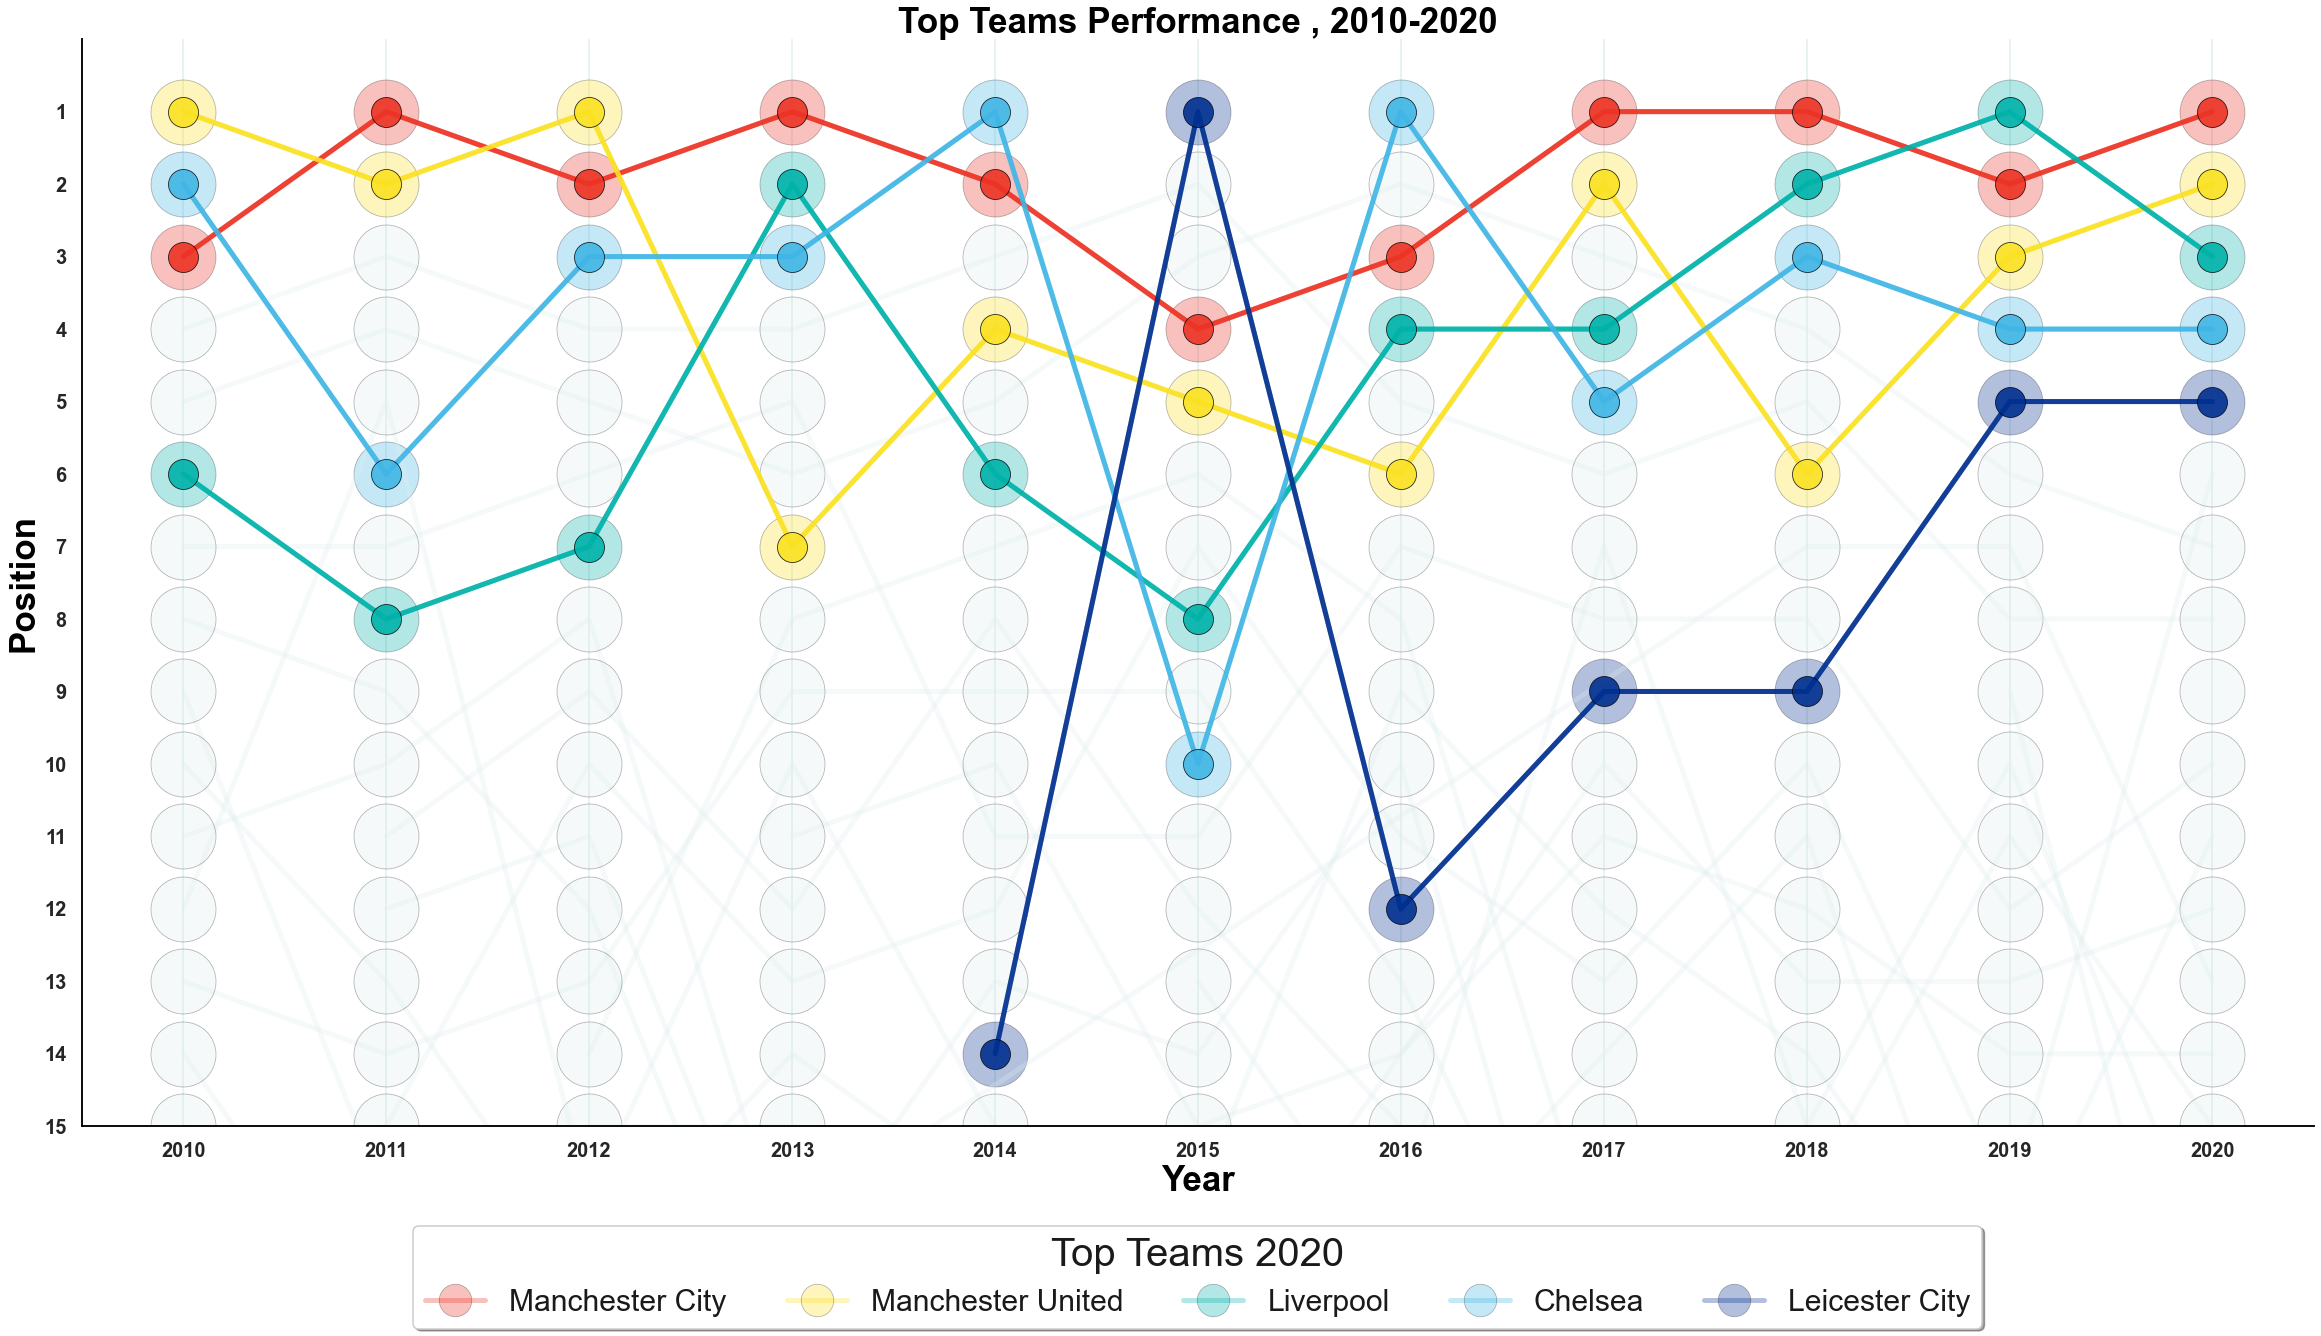

In [12]:
# A Bump Char to show the rank and trends over time

plt.figure(figsize=(40,20))

# Change background style manually and overide seaborn settings
sns.set_style("white",
             {'figure.facecolor': 'white',
             'axes.labelcolor': '.9',
             'axes.axisbelow': True,
             'grid.linestyle':'-',
             'text.color': '.1',
             'image.cmap': 'rocket',
             'axes.grid': False,
             'axes.facecolor': 'white',
             'axes.edgecolor': 'black',
             'grid.color': "#E0EEEE",})

# Change the scale of the plot manually and overide seaborn settings
sns.set_context("poster",
                rc={'axes.linewidth': 1.875,
                 'grid.linewidth': 1.5,
                 'lines.linewidth': 2.25,
                 'lines.markersize': 65,
                 'patch.linewidth': 1.5,
                 'font.size': 5.0,
                 'axes.titlesize': 18.0,
                 'legend.fontsize': 40,
                 'legend.title_fontsize': 40})

# Grey colors dictionary assign to all teams 
hue_colors={
   "Manchester City" : "#EC3325",
    "Manchester United" : '#FBE122',
    "Liverpool": "#00B2A9",
    "Chelsea" : "#41B6E6",
    "Leicester City": "#003090",
    
    "West Ham United": "#E0EEEE",
    "Tottenham Hotspur" : "#E0EEEE",
    "Arsenal" : "#E0EEEE",
    "Everton" : "#E0EEEE",
    "Newcastle United": "#E0EEEE",
    "Southampton": "#E0EEEE",
    "West Bromwich Albion": "#E0EEEE",
    "Aston Villa": "#E0EEEE",
    "Crystal Palace": "#E0EEEE",
    "Stoke City": "#E0EEEE",
    "Sunderland": "#E0EEEE",
    
    "Swansea City": "#E0EEEE",
    "Fulham": "#E0EEEE",
    "Burnley": "#E0EEEE",
    "Wolverhampton Wanderers": "#E0EEEE",
    "Bournemouth": "#E0EEEE",
    "Norwich City": "#E0EEEE",
    "Watford": "#E0EEEE",
    "Brighton & Hove Albion": "#E0EEEE",
    "Wigan Athletic": "#E0EEEE",
    "Hull City": "#E0EEEE",
    "Queens Park Rangers": "#E0EEEE",
    "Blackburn Rovers": "#E0EEEE",
    "Sheffield United": "#E0EEEE",
    "Cardiff City": "#E0EEEE",
    "Huddersfield Town": "#E0EEEE",
    "Bolton Wanderers": "#E0EEEE",
    "Birmingham City": "#E0EEEE",
    "Middlesbrough": "#E0EEEE",
    "Reading": "#E0EEEE",
    "Blackpool": "#E0EEEE",
    "Leeds United": "#E0EEEE"
    
    
    
}

# Hue Colors dictionary assign top teams 
hue_colors_top={
    
   "Manchester City" : "#EC3325",
    "Manchester United" : '#FBE122',
    "Liverpool": "#00B2A9",
    "Chelsea" : "#41B6E6",
    "Leicester City": "#003090"}


# Markers shape dictionary
markers = {
            "Manchester City" : "o",
    "Manchester United" : "o",
    "Liverpool": "o",
    "Chelsea" : "o",
    "Leicester City": "o",
    "West Ham United": "o",
    "Tottenham Hotspur" : "o",
    "Arsenal" : "o",
    "Everton" : "o",
    "Newcastle United": "o",
    "Southampton": "o",
    "West Bromwich Albion": "o",
    "Aston Villa": "o",
    "Crystal Palace": "o",
    "Stoke City": "o",
    "Sunderland": "o",
    
    "Swansea City": "o",
    "Fulham": "o",
    "Burnley": "o",
    "Wolverhampton Wanderers": "o",
    "Bournemouth": "o",
    "Norwich City": "o",
    "Watford": "o",
    "Brighton & Hove Albion": "o",
    "Wigan Athletic": "o",
    "Hull City": "o",
    "Queens Park Rangers": "o",
    "Blackburn Rovers": "o",
    "Sheffield United": "o",
    "Cardiff City": "o",
    "Huddersfield Town": "o",
    "Bolton Wanderers": "o",
    "Birmingham City": "o",
    "Middlesbrough": "o",
    "Reading": "o",
    "Blackpool": "o",
    "Leeds United": "o"
      
       }
# Legend labels dictionary for top temas colors
labels = { "Manchester City" : "#EC3325",
    "Manchester United" : '#FBE122',
    "Liverpool": "#00B2A9",
    "Chelsea" : "#41B6E6",
    "Leicester City": "#003090"}



# Line plot with All team faded in grey colors (df_EPL_copy) dataframe
chart = sns.lineplot(data=df_EPL_copy, x="Season_year",y="Pos", hue="Team",
                     style="Team",linewidth = 5, markers=markers,legend = False,
                     
                     dashes=False, palette = hue_colors , markeredgecolor = 'black',alpha=0.3
            )



# Line plot with Top5 teams with thier highlighted colors (df_top_teams) dataframe
#markerfacecolor='white'
chart_top = sns.lineplot(data = df_top_teams, x="Season_year",y="Pos", hue="Team",
                     style="Team",linewidth = 5, markers=markers,
                     dashes=False, palette=hue_colors_top, alpha=0.9,
                        markeredgecolor = 'black',markersize=30
                           
            )

#Remove the top and right spines from plot(s).
sns.despine(fig=None, ax=None, top=True, right=True, left=False,
            bottom=False, offset=None, trim=False)




plt.xticks(fontweight='bold', fontsize='20')
plt.yticks(fontweight='bold', fontsize='20')


plt.gca().invert_yaxis()

plt.yticks([15, 14, 13, 12, 11,10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
           ["15", "14", "13", "12", "11","10", "9", "8", "7", "6", "5", "4", "3", "2","1"])


#plt.style.use('dark_background')

#sns.plotting_context()
chart.set_ylim(15, 0)
chart_top.set_ylim(15, 0)

plt.grid(axis="x")


chart_top.legend(labels,loc='lower center',title = "Top Teams 2020",bbox_to_anchor=(.5, -.2),
             ncol=5, fancybox=True, shadow=True, prop={'size': 30},markerscale = (.5))





plt.xlabel('Year', fontweight='bold', 
           fontsize='35', horizontalalignment='center',color = 'black')

plt.ylabel('Position', fontweight='bold', 
           fontsize='35', horizontalalignment='center',color = 'black')


plt.title('Top Teams Performance , 2010-2020', fontweight='bold', 
          fontsize='35', horizontalalignment='center',color = 'black')


plt.show()




##  Best attacking or defensive barplots

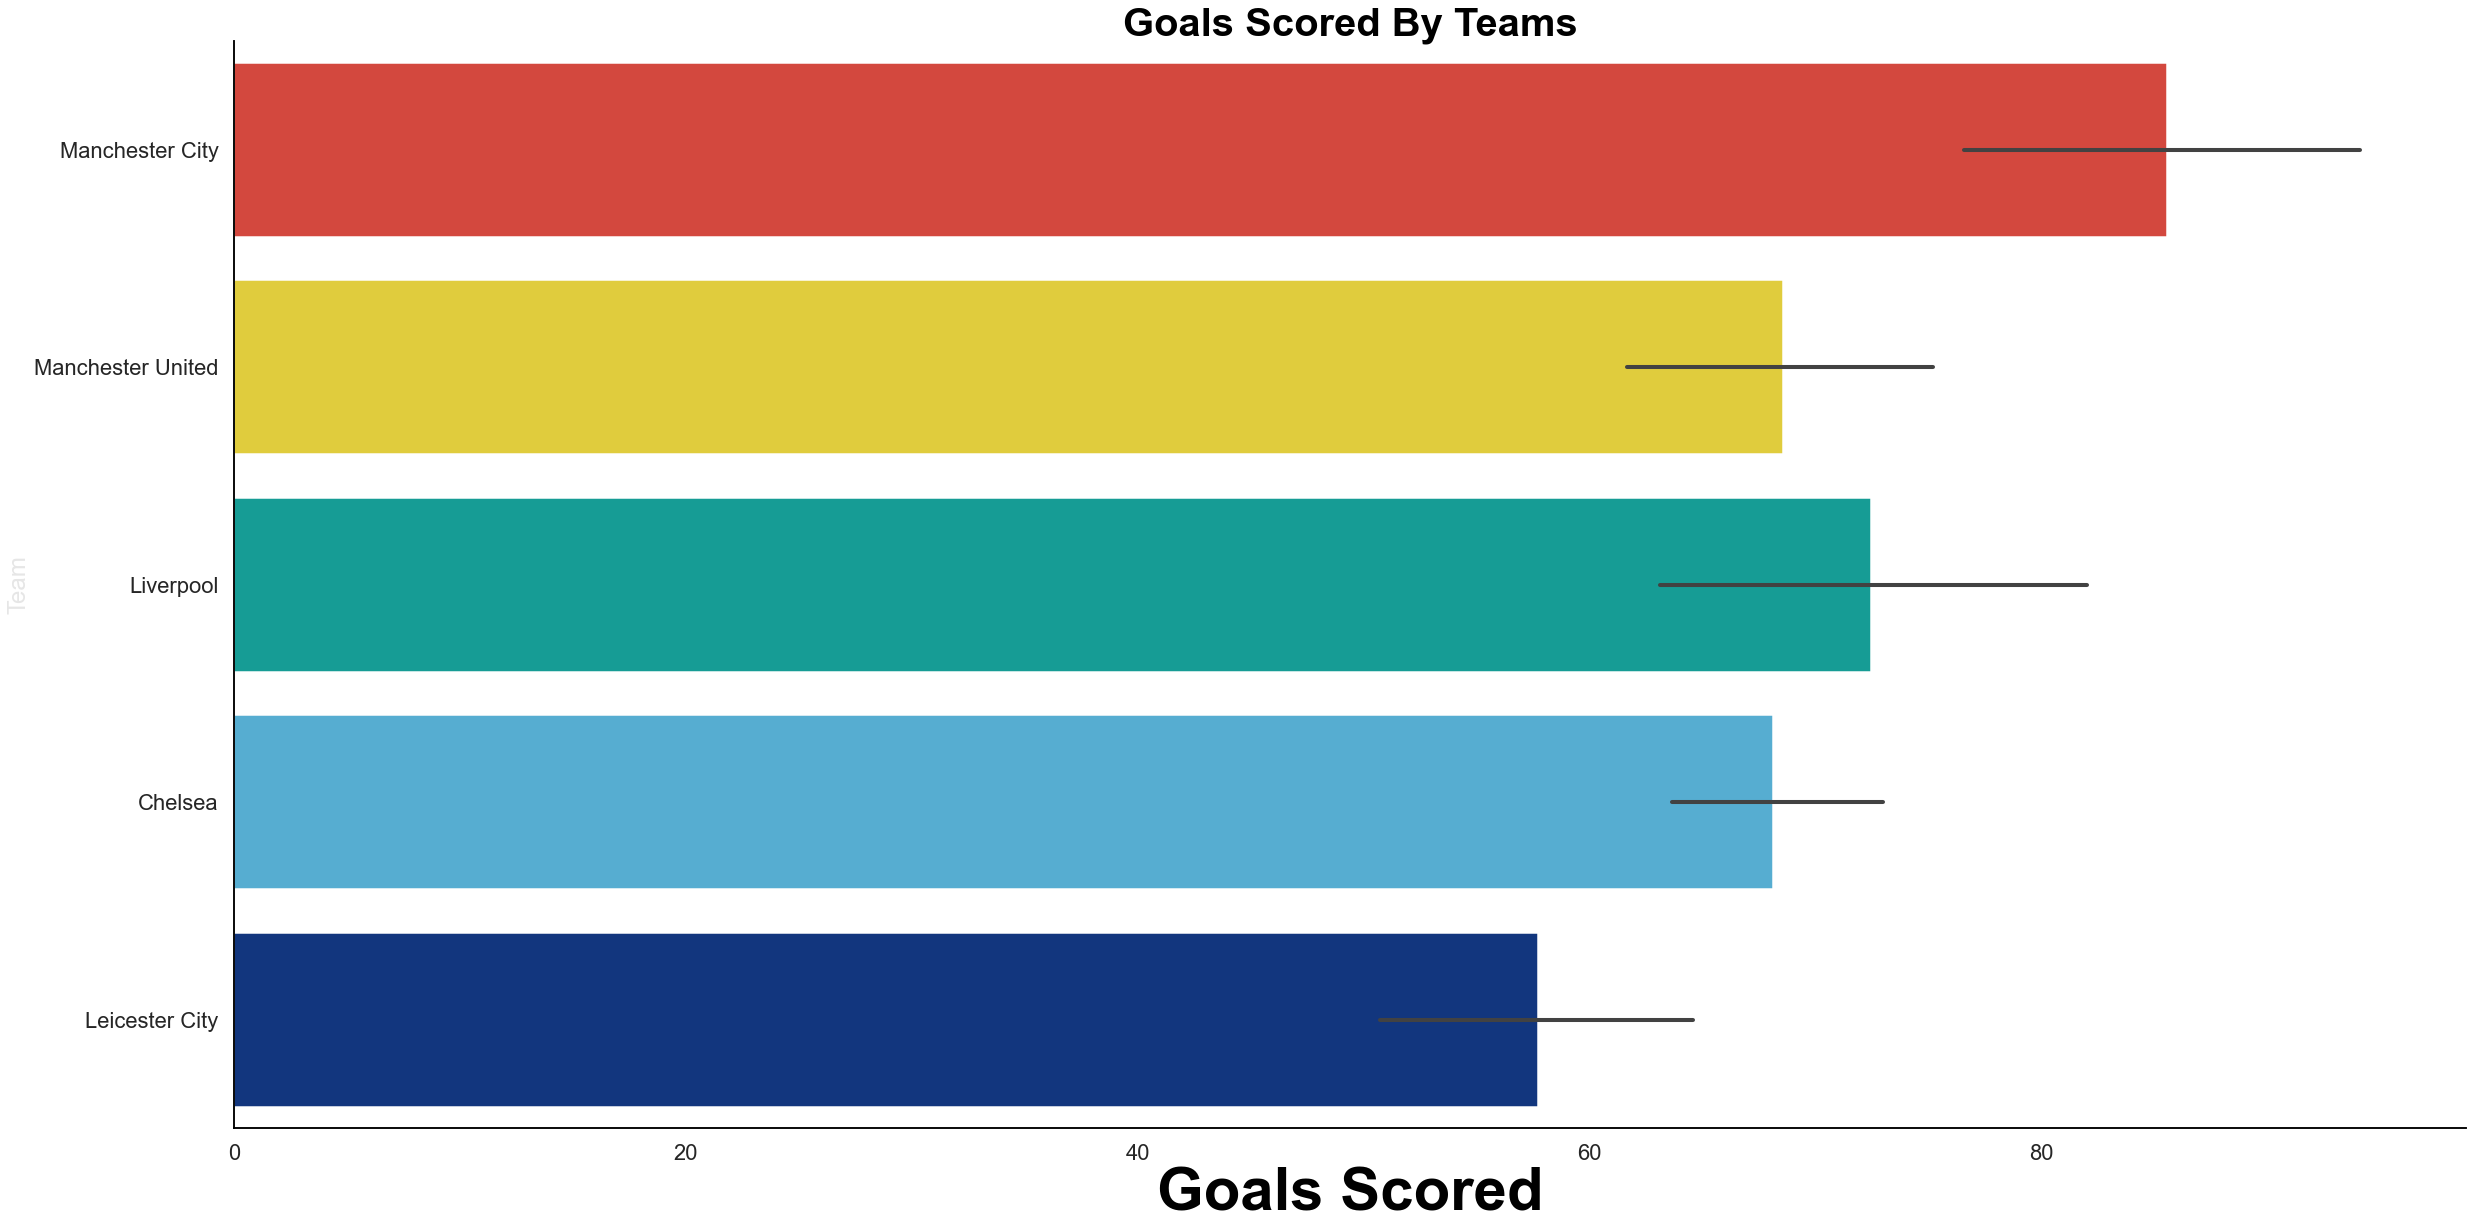

In [13]:
# Barplot of Goals Scored By Teams

plt.figure(figsize=(40,20))

g = sns.barplot(data = df_top_teams, y="Team",x="GF",  dodge=False,
                        palette=labels     
            )

plt.xlabel('Goals Scored', fontweight='bold', 
           fontsize='60', horizontalalignment='center',color = 'black')

plt.title('Goals Scored By Teams', fontweight='bold', 
          fontsize='40', horizontalalignment='center',color = 'black') 
    
#Remove the top and right spines from plot(s).
sns.despine(fig=None, ax=None, top=True, right=True, left=False,
            bottom=False, offset=None, trim=False)

    
plt.show()



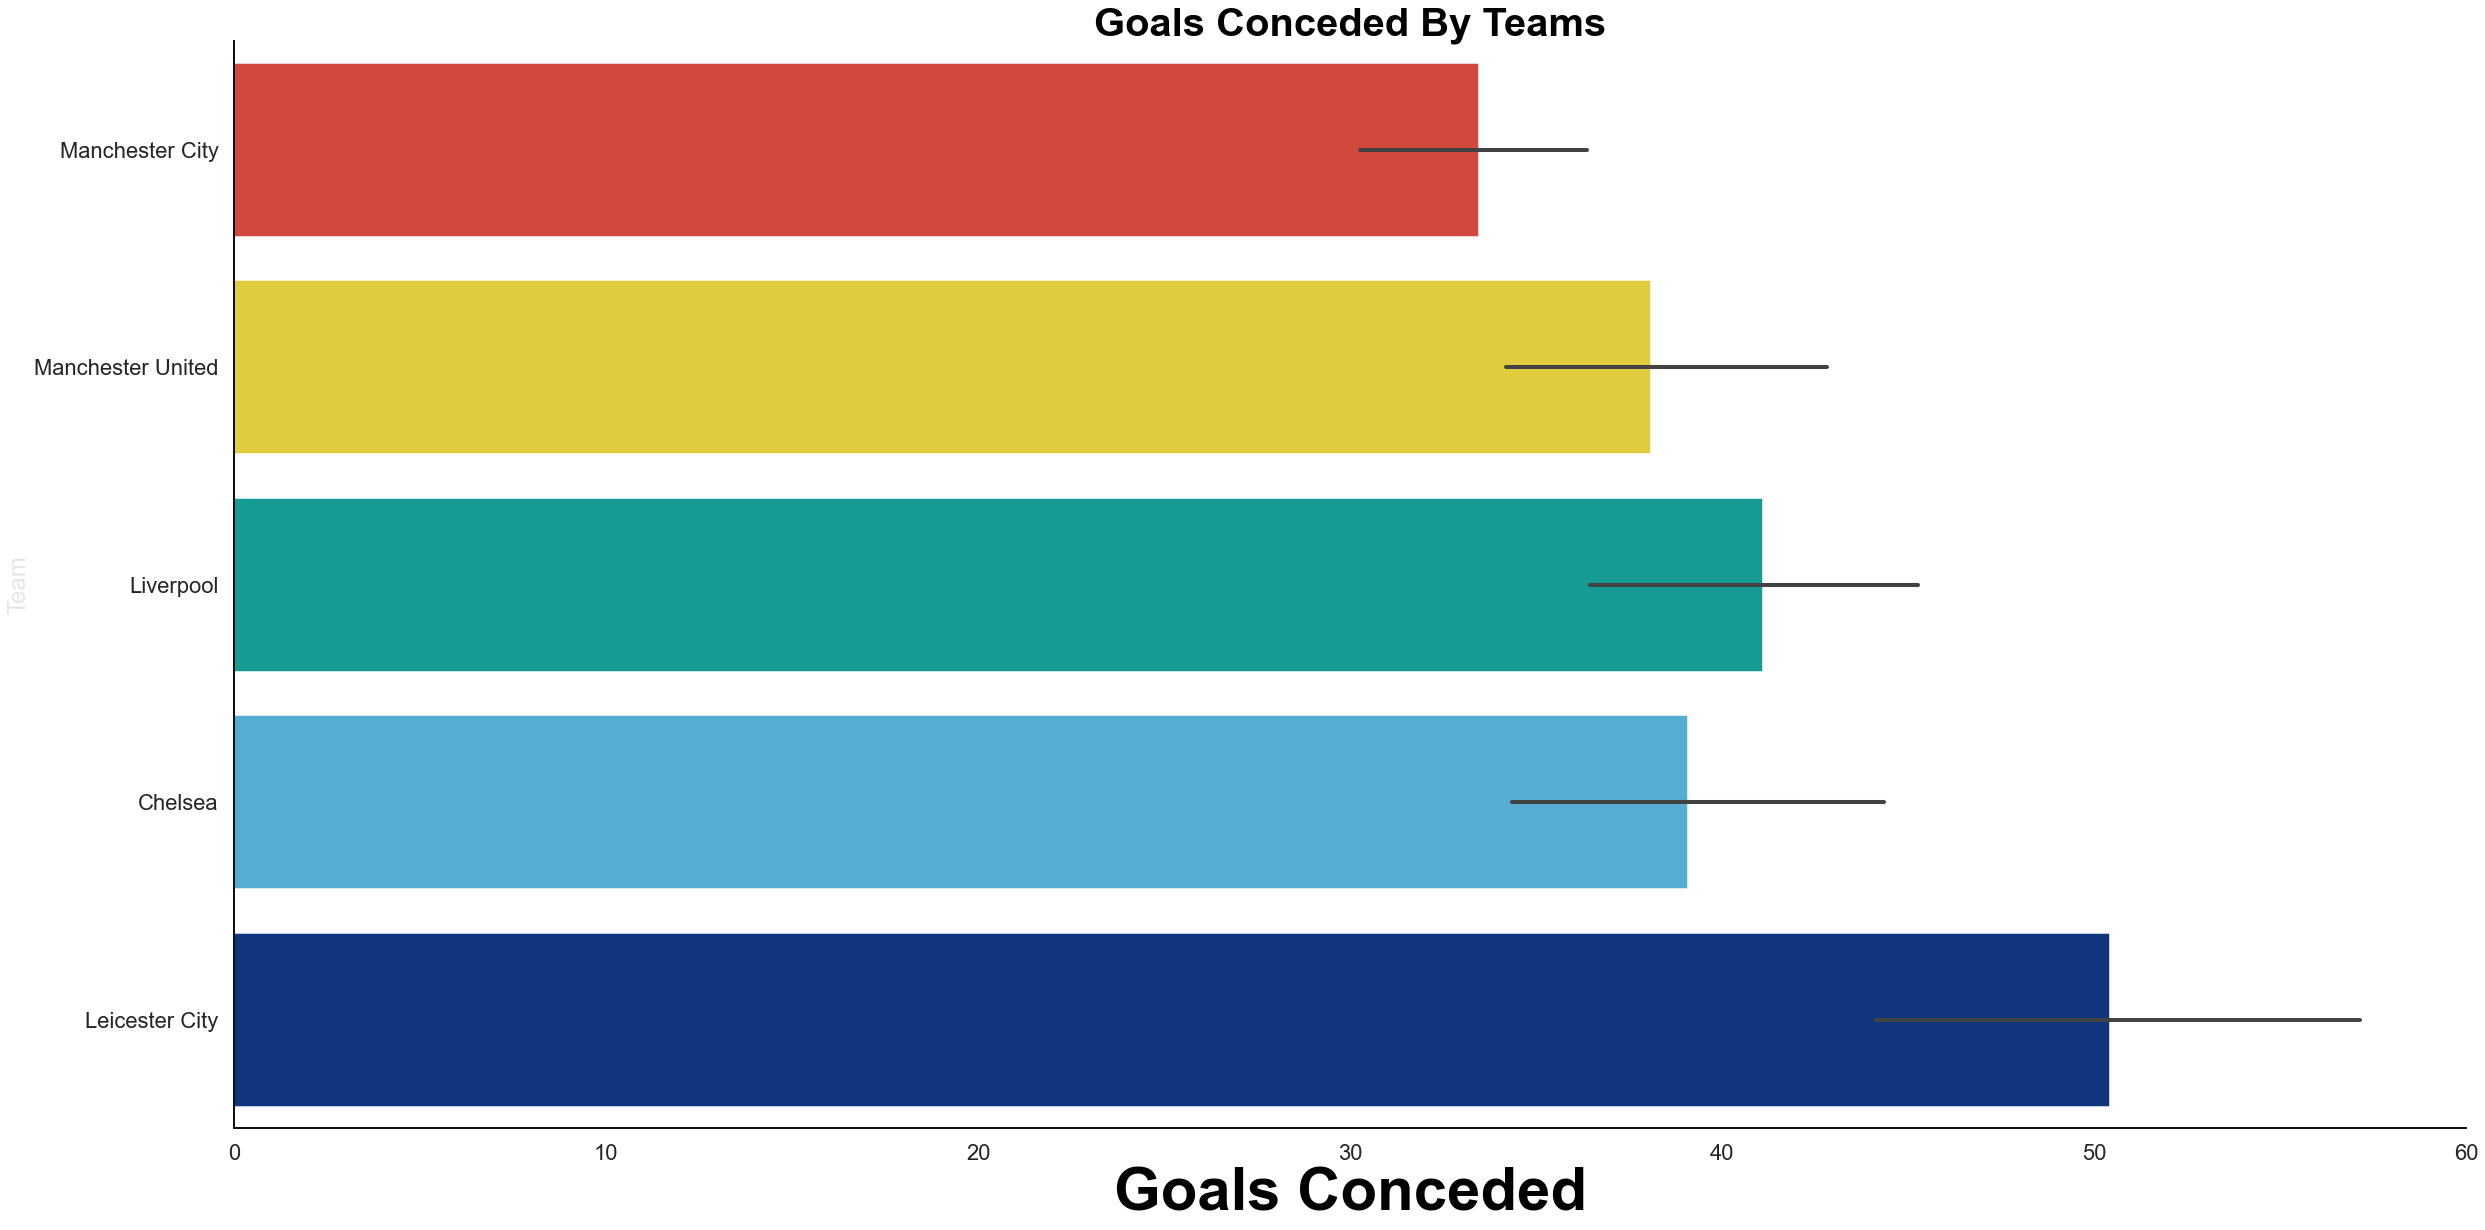

In [14]:

 # Barplot of Goals Conceded By Teams


plt.figure(figsize=(40,20))


g = sns.barplot(data = df_top_teams, y="Team",x="GA",  dodge=False,
                        palette=labels 
            )

plt.xlabel('Goals Conceded', fontweight='bold', 
           fontsize='60', horizontalalignment='center',color = 'black')



plt.title('Goals Conceded By Teams', fontweight='bold', 
          fontsize='40', horizontalalignment='center',color = 'black') 
    

#Remove the top and right spines from plot(s).
sns.despine(fig=None, ax=None, top=True, right=True, left=False,
            bottom=False, offset=None, trim=False)

    
plt.show()



### Relation plot between Goal scoring versus Points and team Positions

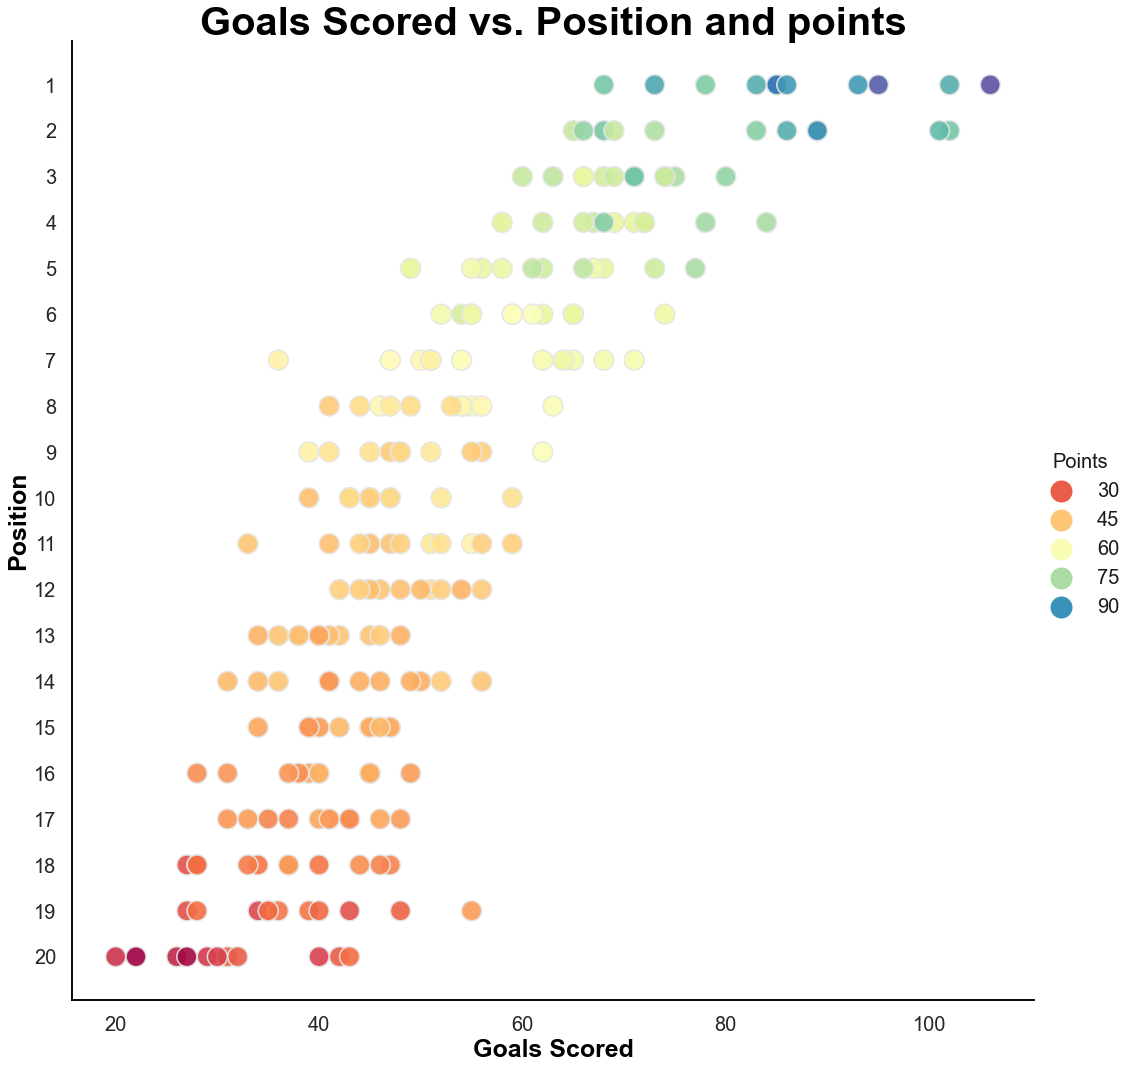

In [15]:

# Change the scale of the plot manually and overide seaborn settings

sns.set_context("poster",
                rc={
                'axes.labelsize': 20,
                'axes.titlesize': 20,
                'xtick.labelsize': 20,
                 'ytick.labelsize': 20,
                'axes.linewidth': 1.875,
                 'grid.linewidth': 1.5,
                 'lines.linewidth': 2.25,
                'lines.markersize': 20,
                 'font.size': 40,
                 'axes.titlesize': 20.0,
                 'legend.fontsize': 20,
                 'legend.title_fontsize': 20})

# Change background style manually and overide seaborn settings
sns.set_style("white",
             {'figure.facecolor': 'white',
             'axes.labelcolor': '.9',
             'axes.axisbelow': True,
             'grid.linestyle':'-',
             'text.color': '.1',
             'image.cmap': 'rocket',
             'axes.grid': False,
             'axes.facecolor': 'white',
             'axes.edgecolor': 'black',
             'grid.color': "#E0EEEE",})




# vlag,Spectral,Spectral,icefire, coolwarm

g = sns.relplot(
    data=df_EPL_copy, x="GF", y="Pos", height=15, palette="Spectral",hue="Pts",
     edgecolor=".9",
        markers=True, alpha=0.9, legend="brief")


plt.gca().invert_yaxis()

plt.yticks([20, 19, 18, 17, 16,15, 14, 13, 12, 11,10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
          ["20", "19", "18", "17","16","15", "14", "13", "12", "11","10", "9", "8", "7", "6", "5", "4", "3", "2","1"])



plt.xlabel('Goals Scored', fontweight='bold', 
           fontsize='25', horizontalalignment='center',color = 'black')

plt.ylabel('Position', fontweight='bold', 
           fontsize='25', horizontalalignment='center',color = 'black')


plt.title('Goals Scored vs. Position and points', fontweight='bold', 
          fontsize='40', horizontalalignment='center',color = 'black') 
    
g._legend.set_title("Points")
    
# loc='lower center',title = "Top Teams 2020",bbox_to_anchor=(5, -.2),
#             ncol=5, fancybox=True, shadow=True, prop={'size': 30},markerscale = (.5)   
#    
    
plt.show()